In [1]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil
import numpy as np
import sys

In [2]:
sys.path.insert(1, 'D:/spark/gits/apexmf')

In [3]:
wd = "D:/spark/animas_amrs"
os.chdir(wd)

In [4]:
t_d = os.path.join(wd, "ies_template_pp")

In [63]:
# test run
pyemu.os_utils.run("pestpp-ies animas_amrs_rw.pst",cwd=t_d)

In [55]:
# reweight
pst = pyemu.Pst(os.path.join(t_d,'animas_amrs_rw.pst'))
pst.phi


4065513067438.6865

In [57]:
balanced_groups = {grp:100000 for grp in pst.nnz_obs_groups}
# print(pst.phi) #assumes "my.res" is colocated with "my.pst"
pst.adjust_weights(obsgrp_dict=balanced_groups)

In [58]:
obs = pst.observation_data.copy()
obs.to_csv('test_obs.csv')

In [61]:
obs.to_csv('test_obs.csv')

In [62]:
pst.write(os.path.join(t_d,'animas_amrs_rw.pst'))

noptmax:0, npar_adj:335, nnz_obs:2734


In [5]:
# org_t_d = os.path.join("master_glm_1")
# if not os.path.exists(org_t_d):
#     raise Exception("you need to run the '/part2_04_glm/freyberg_glm_1.ipynb' notebook")

# if os.path.exists(t_d):
#     shutil.rmtree(t_d)
# shutil.copytree(org_t_d,t_d)

In [5]:
num_workers = psutil.cpu_count(logical=False)

In [6]:
m_d = os.path.join('main_ies_1_pp')

In [ ]:
pyemu.os_utils.start_workers(t_d, # the folder which contains the "template" PEST dataset
                            'pestpp-ies', #the PEST software version we want to run
                            'animas_amrs_rw_pp.pst', # the control file to use with PEST
                            num_workers=num_workers, #how many agents to deploy
                            worker_root='.', #where to deploy the agent directories; relative to where python is running
                            master_dir=m_d, #the manager directory
                            )

In [7]:
pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_rw_pp.pst'))

In [8]:
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_rw_pp.0.obs.csv")
    )
pt_oe = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_rw_pp.{0}.obs.csv".format(pst.control_data.noptmax)))


In [9]:
pt_oe

return type uncaught, losing Ensemble type, returning DataFrame


,d009_cca_19961119,d009_cca_19970108,d009_cca_19970130,d009_cca_19970225,d009_cca_19970325,d009_cca_19970429,d009_cca_19970514,d009_cca_19970521,d009_cca_19970529,d009_cca_19970605,...,m075_lso4_200707,m075_lso4_200810,m075_lso4_200812,m075_lso4_200902,m075_lso4_200904,m075_lso4_200906,m075_lso4_200912,m075_lso4_201005,m075_lso4_201007,m075_lso4_201111
real_name,,,,,,,,,,,,,,,,,,,,,
4,285.373,562.006,565.719,354.188,357.924,358.154,3.00907,19.28760,3.62706,3.72349,...,176851,188751.0,164811,166511,205667.0,235126.0,158067,339826,236565.0,158227
6,645.772,769.270,785.353,758.292,766.319,473.910,2.26544,8.05215,3.01541,2.37436,...,191888,193318.0,164661,155126,219479.0,252786.0,162930,376874,228149.0,162004
8,567.322,652.490,657.970,662.744,493.561,515.446,2.91510,16.75370,4.02765,2.62255,...,135608,121330.0,108615,108186,132880.0,147907.0,103693,200956,168299.0,113736
9,259.213,262.207,263.268,264.413,265.957,267.009,4.09065,20.61490,4.15741,3.77365,...,182156,169808.0,148966,162779,193390.0,224677.0,144656,406822,226939.0,163044
10,208.331,374.121,388.717,277.366,259.400,352.884,2.40078,12.65200,3.20766,2.60628,...,183761,192386.0,175797,171923,224524.0,239489.0,159182,365691,219513.0,161855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,444.340,492.696,513.544,526.451,518.332,440.052,2.21206,10.74930,2.88403,2.12512,...,148179,119490.0,105058,109350,127624.0,144599.0,97791,219138,160380.0,106289
292,475.840,603.518,605.640,435.774,384.694,388.044,2.42218,11.92150,3.16920,3.33078,...,176600,171548.0,150584,141944,196067.0,268362.0,145426,328331,203098.0,140504
293,240.345,318.830,315.302,378.653,260.559,268.586,2.90308,10.65950,2.53107,1.52248,...,187047,191238.0,163575,190938,213209.0,257918.0,160009,487340,253628.0,164011


<Figure size 800x1050 with 0 Axes>

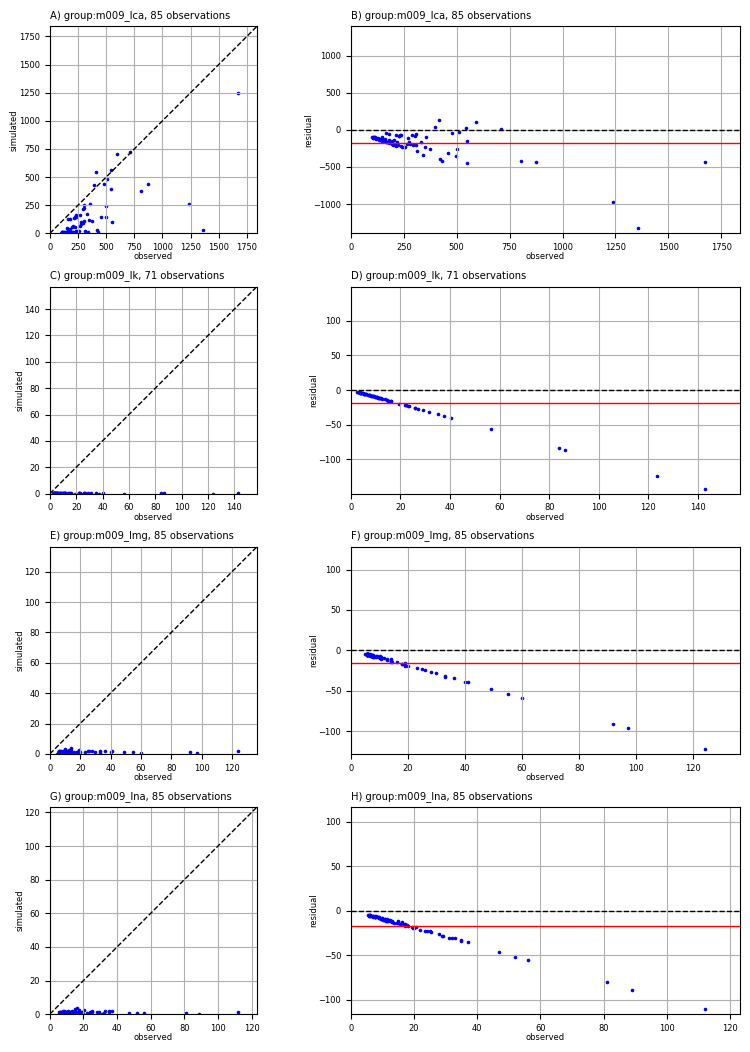

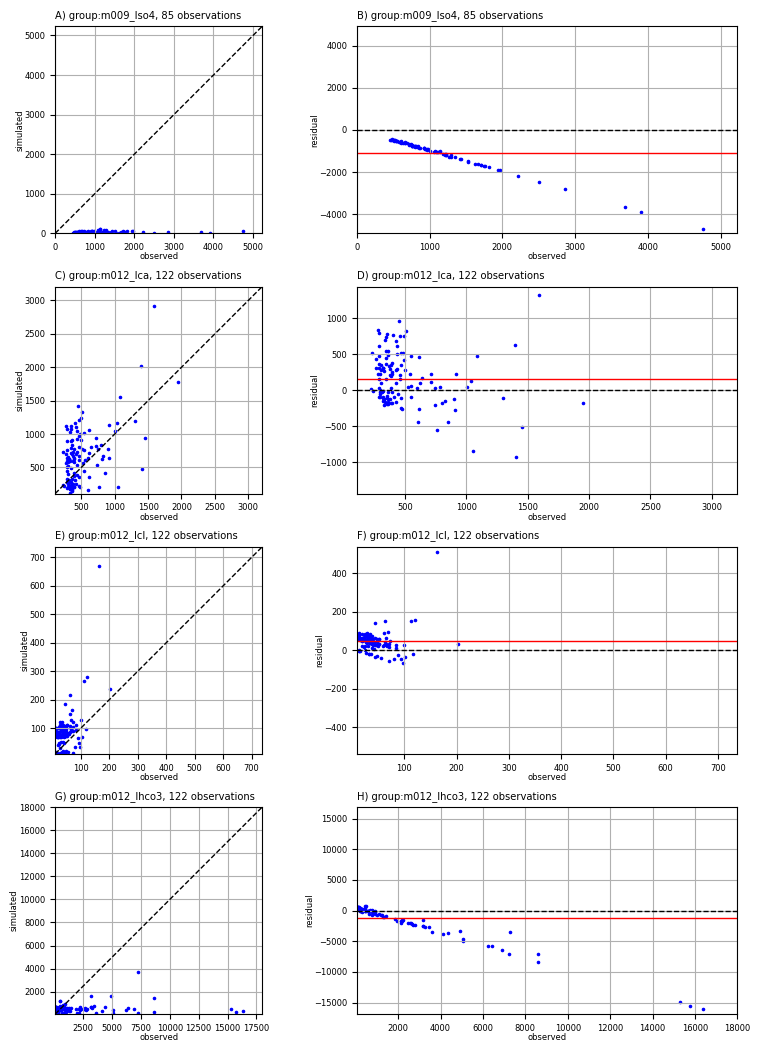

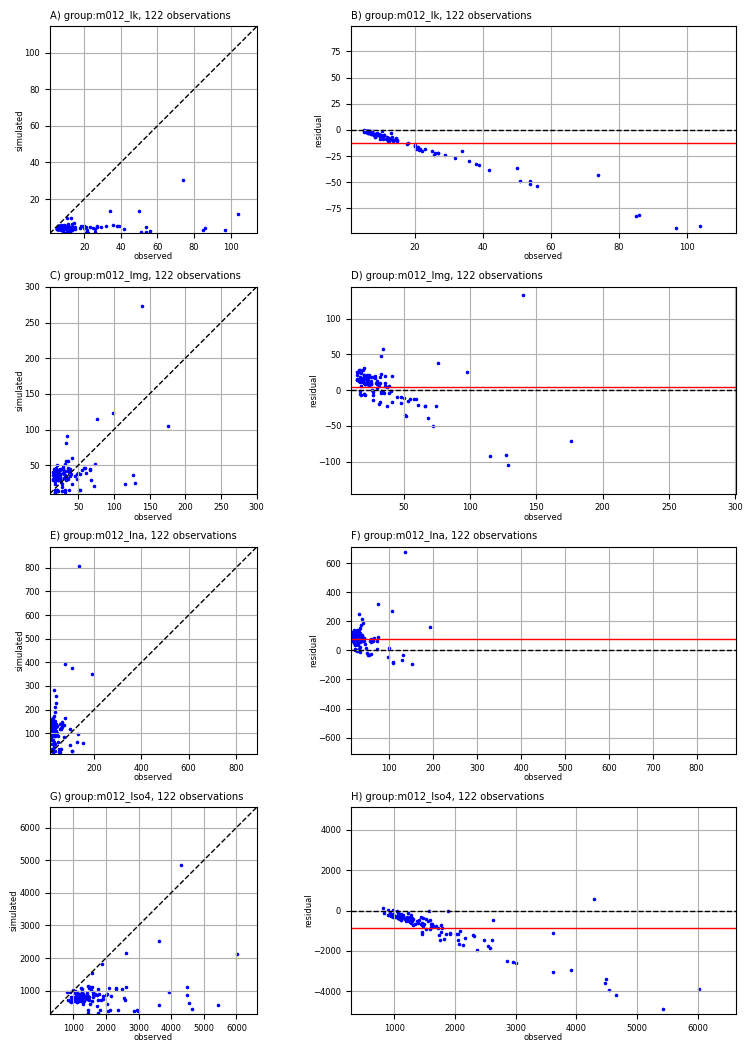

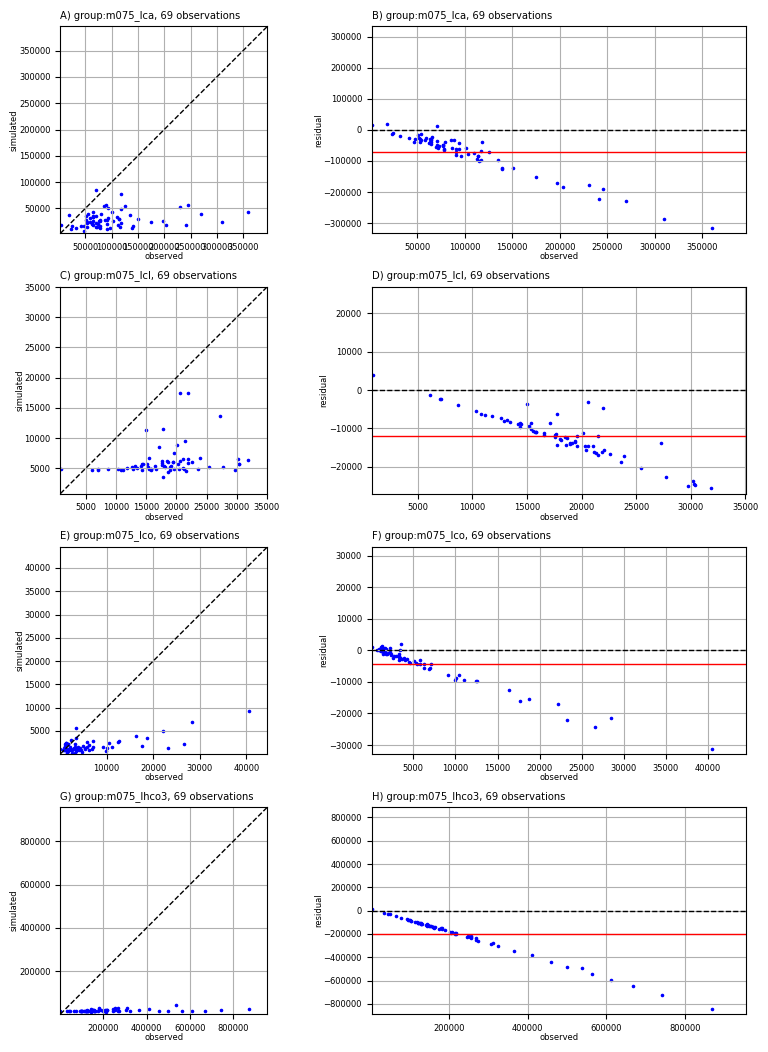

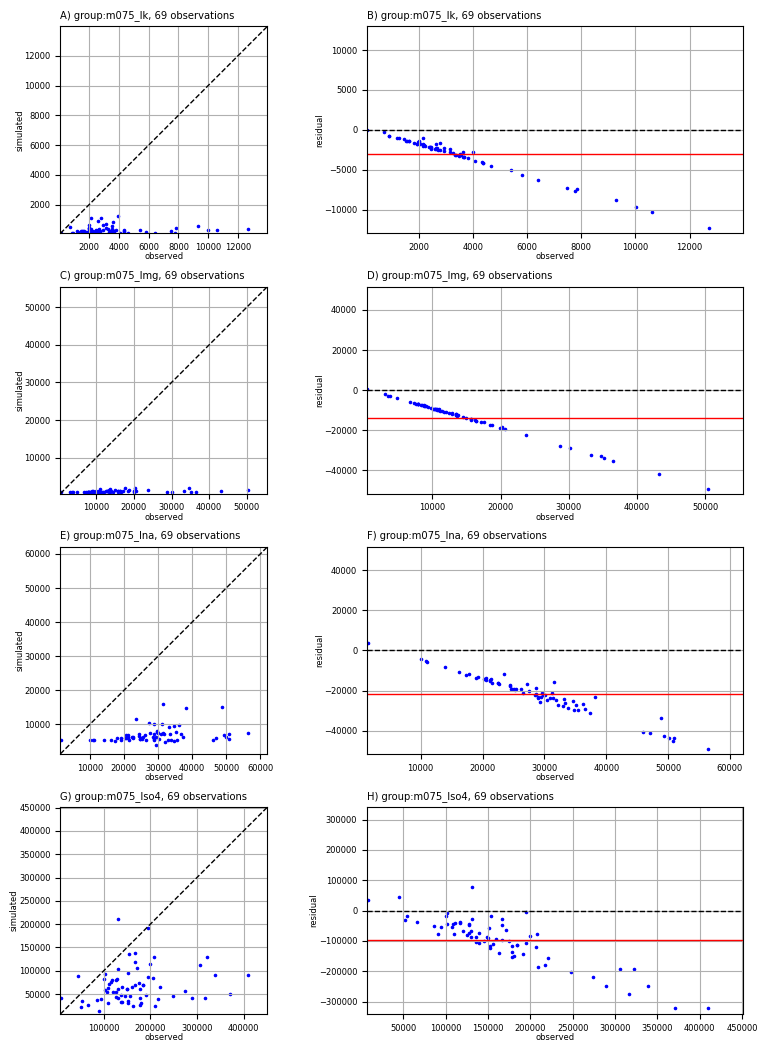

In [10]:
pyemu.plot_utils.res_1to1(pst);

In [40]:
pt_oe.phi_vector

real_name
4       2.299104e+12
6       2.384758e+12
8       2.407269e+12
9       2.488514e+12
10      2.499956e+12
            ...     
291     2.665198e+12
292     2.416455e+12
293     2.237955e+12
298     2.296737e+12
base    2.045524e+12
Length: 167, dtype: float64

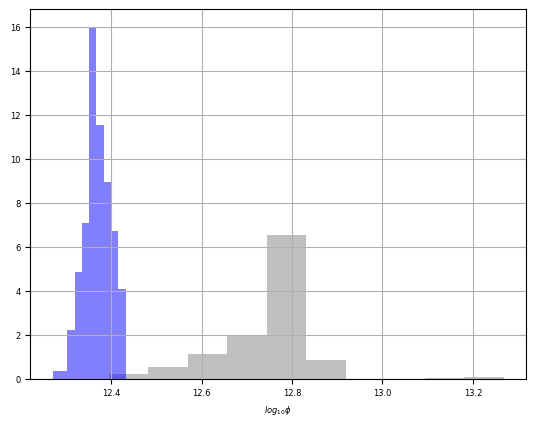

In [24]:
fig,ax = plt.subplots(1,1)
pr_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="0.5",ec="none",alpha=0.5,density=True)
pt_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="b",ec="none",alpha=0.5,density=True)
_ = ax.set_xlabel("$log_{10}\\phi$")

In [12]:
obs = pst.observation_data.copy()

In [13]:
obs

,obsnme,obsval,weight,obgnme,oname,otype,usecol,time,i,j,totim
obsnme,,,,,,,,,,,
d009_cca_19961119,d009_cca_19961119,52.4,0.0,d009_cca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d009_cca_19970108,d009_cca_19970108,56.1,0.0,d009_cca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d009_cca_19970130,d009_cca_19970130,69.2,0.0,d009_cca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d009_cca_19970225,d009_cca_19970225,60.1,0.0,d009_cca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d009_cca_19970325,d009_cca_19970325,44.8,0.0,d009_cca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
m075_lso4_200906,m075_lso4_200906,220707.0,1.0,m075_lso4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m075_lso4_200912,m075_lso4_200912,130089.0,1.0,m075_lso4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m075_lso4_201005,m075_lso4_201005,248012.0,1.0,m075_lso4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def plot_tseries_ensembles(
                    pr_oe, pt_oe, dot=True,
#                     onames=["hds","sfr"]
                    ):
    pst.try_parse_name_metadata()
    # get the observation data from the control file and select 
    obs = pst.observation_data.copy()
    time_col = []
    for i in range(len(obs)):
        if obs.iloc[i, 0][0] == "d":
            time_col.append(obs.iloc[i, 0][-8:])
        elif obs.iloc[i, 0][0] == "m":
            time_col.append(obs.iloc[i, 0][-6:])
    obs.time = time_col
#     # onames provided in oname argument
#     obs = obs.loc[obs.oname.apply(lambda x: x in onames)]
    # only non-zero observations
    obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    # make a plot
    ogs = obs.obgnme.unique()
    fig,axes = plt.subplots(len(ogs),1,figsize=(10,4*len(ogs)))
    ogs.sort()
    # for each observation group (i.e. timeseries)
    for ax,og in zip(axes,ogs):
        # get values for x axis
        oobs = obs.loc[obs.obgnme==og,:].copy()
        oobs.loc[:,"time"] = oobs.time.astype(str)
#         oobs.sort_values(by="time",inplace=True)
        tvals = oobs.time.values
        onames = oobs.obsnme.values
        if dot is True:
            # plot prior
            [ax.scatter(tvals,pr_oe.loc[i,onames].values,color="gray",s=30, alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.scatter(tvals,pt_oe.loc[i,onames].values,color='b',s=30,alpha=0.2) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.scatter(oobs.time,oobs.obsval,color='red',s=30).set_facecolor("none")
        if dot is False:
            # plot prior
            [ax.plot(tvals,pr_oe.loc[i,onames].values,"0.5",lw=0.5,alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.plot(tvals,pt_oe.loc[i,onames].values,"b",lw=0.5,alpha=0.5) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.plot(oobs.time,oobs.obsval,"r-",lw=2)
        ax.tick_params(axis='x', labelrotation=90)
        ax.margins(x=0.01)
        ax.set_title(og,loc="left")
    fig.tight_layout()
    return fig

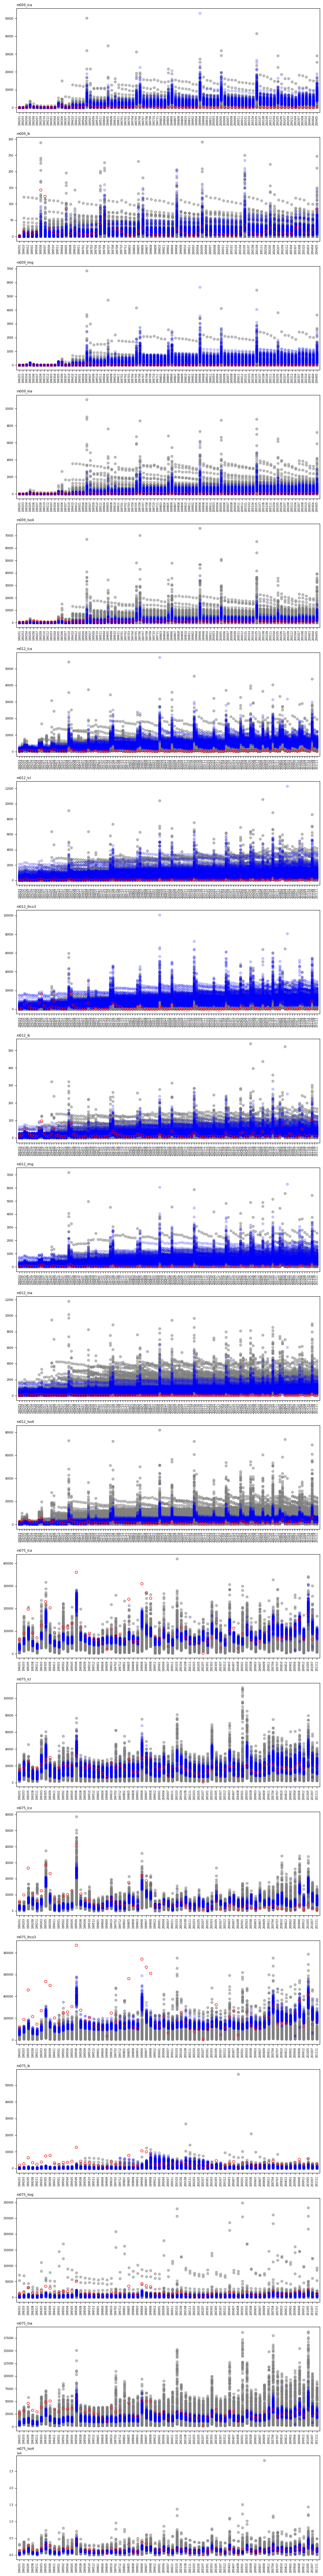

In [19]:
fig = plot_tseries_ensembles(pr_oe, pt_oe)

In [45]:
os.getcwd()

'D:\\spark\\animas_amrs\\main_ies_1_only_mld'

In [47]:
pst.parrep(parfile=os.path.join('animas_amrs_pp.7.base.par'))

Updating parameter values from animas_amrs_pp.7.base.par
parrep: updating noptmax to 0


In [26]:
# updates the model input files with parameter values
pst.write_input_files(pst_path=m_d)

In [35]:
m_d

'main_ies_1_only_mld'

In [37]:
# run the model forward run; this applies all the multipler paarameters, executes MODFLOW6 and MODPATH7 and then postprocess observations
pyemu.os_utils.run('python salt_forward_run.py')